# Shraavan Sridhar

In [4]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',850)
pd.set_option('display.max_rows',500)

In [6]:
#Reading the file and checking the first 5 data.

leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#Analysing the numerical columns.

leads.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#anaylsing all the columns 

leads.info()


#many missing values can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#checking the shape of the dataframe
leads.shape

(9240, 37)

## 1.Data Cleaning

In [10]:
# We noticed many 'select' in our data frame, this is simply because the users have not selected the attributes through the drop down menu. Replacing this by Null values. 

leads=leads.replace('Select',np.nan)

In [11]:
# The select phrase is replaced with NaN.
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#Checking the number of unique values in each column.

unique=leads.nunique()

In [13]:
#filtering columns that have less than 2 unique values.
unique[unique<2]

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64

In [14]:
# The columns with one unqiue value are not significant for our analysis. Hence we drop the above columns.

leads=leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [15]:
leads.shape

(9240, 32)

In [16]:
# Let us analysise the missing values.

null=round((leads.isnull().sum())*100/len(leads),2)
null

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
## Filtering and dropping the columns with null values greater than 40% along with the tags column which is irrelavant for our analysis.
null[null>40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [18]:
leads=leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags'],axis=1)

In [19]:
leads.shape

(9240, 24)

In [20]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [21]:
#checking missing values again
round((leads.isnull().sum())*100/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [22]:
# Replacing the NaN values for object type variable with 'Unknown'
col=['Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','City']
leads[col]=leads[col].fillna('Unknown')

In [23]:
round((leads.isnull().sum())*100/len(leads),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [24]:
# Replacing the NaN values for float type variable with median.
num_col=['TotalVisits','Page Views Per Visit']
leads[num_col]=leads[num_col].fillna(leads[num_col].median())

In [25]:
#Checking for missing values. 
round((leads.isnull().sum())*100/len(leads),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [26]:
# NO more missing values are reported. # Checking the shape of the df
leads.shape

(9240, 24)

In [27]:
# Dropping columns insignificant columns 
leads=leads.drop(['Prospect ID','Lead Number','A free copy of Mastering The Interview'],axis=1)

# 2.EDA

### 2.1 Comparing categorical variables with target variable.

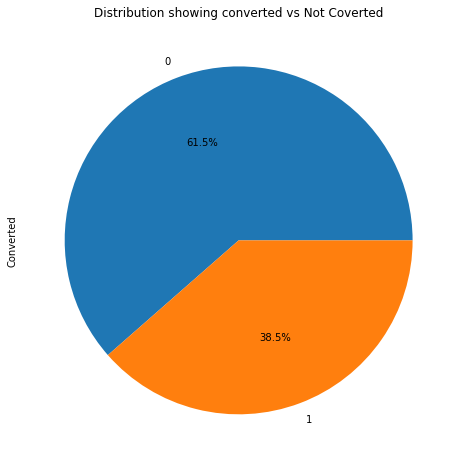

In [28]:
plt.figure(figsize=[10,8])
plt.title('Distribution showing converted vs Not Coverted')
leads.Converted.value_counts().plot.pie(autopct='%0.1f%%')
plt.show()

#### We notice that the non-converison are way more than conversions.

In [29]:
def count(var):
    plt.figure(figsize=[20,8])
    sns.countplot(x=var,hue='Converted',data=leads,order=leads[var].value_counts().index)
    plt.xticks(rotation=45)
    return plt.show()

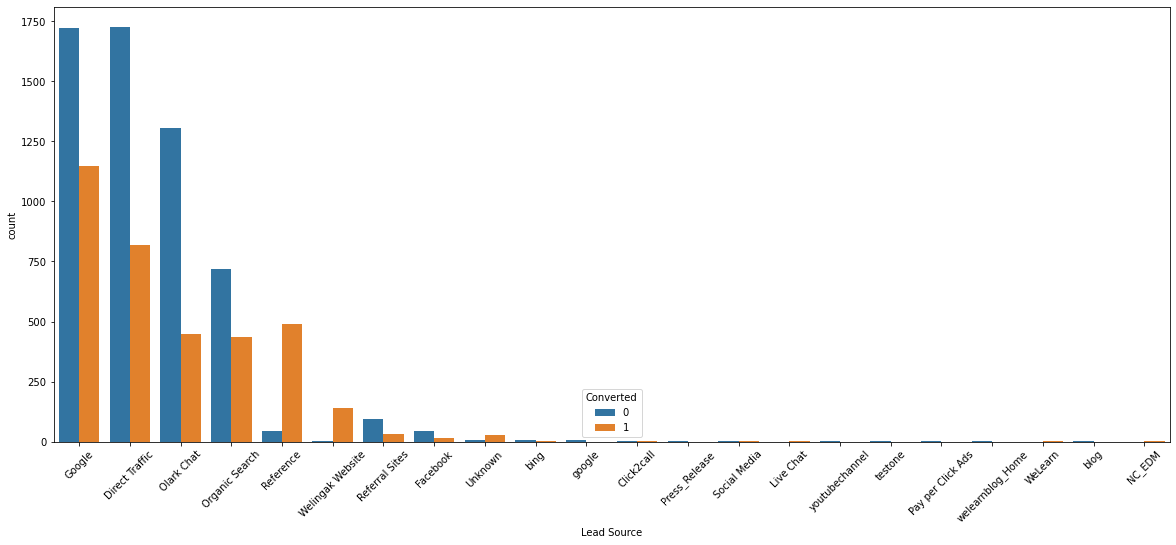

In [30]:
count('Lead Source')

#### Most traffic comes from Google and Direct Traffic
#### For leads through references, the conversion is more than non-conversion. References go a long way in conversions.

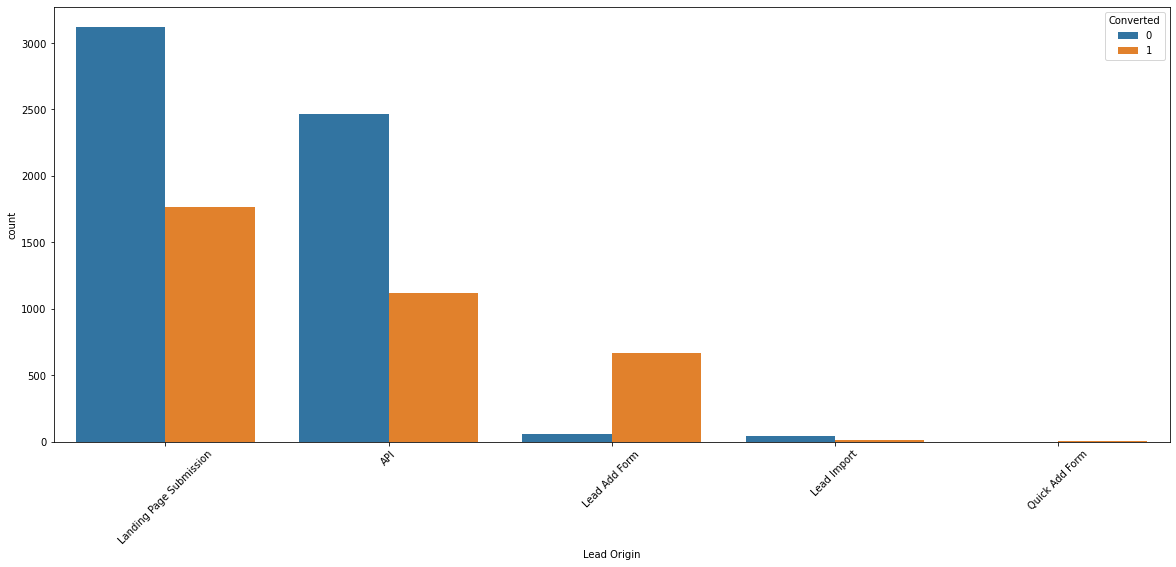

In [31]:
count('Lead Origin')

#### APIs and landing page leads yield more leads. Lead Add Form seems to have higer rate of conversion.

In [32]:
leads.Country.value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [33]:
#Since there are multiple countries, we group  the countries with less than 50 leads into 'Others'
c=['India','Unknown','United States','United Arab Emirates']
leads.Country=leads.Country.apply(lambda x:x if (x in c) else x.replace(x,'Others'))

In [34]:
leads.Country.value_counts()

India                   6492
Unknown                 2461
Others                   165
United States             69
United Arab Emirates      53
Name: Country, dtype: int64

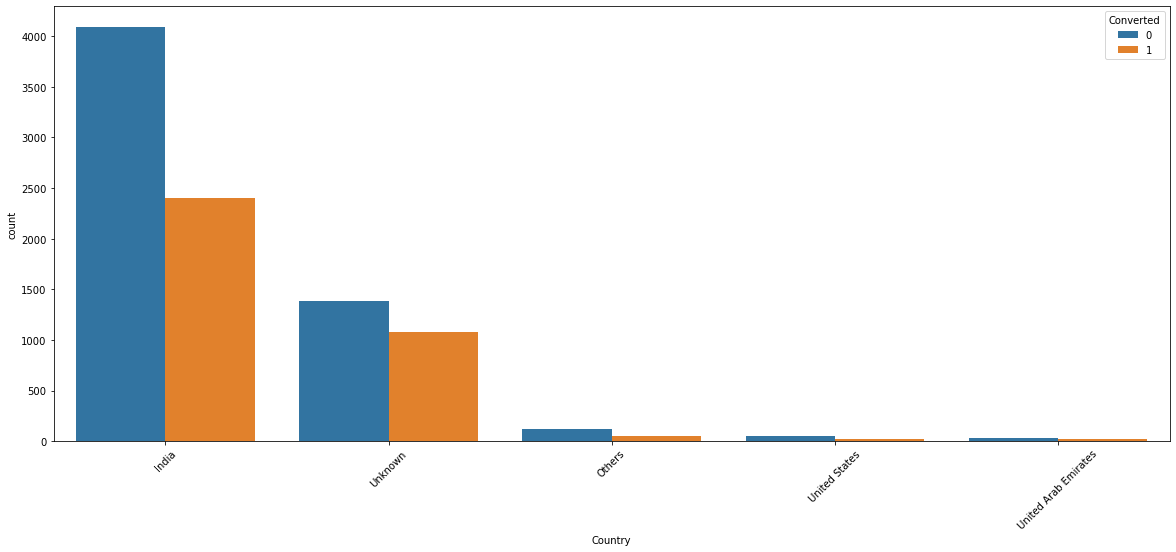

In [35]:
count('Country')

#### Max leads are from India.

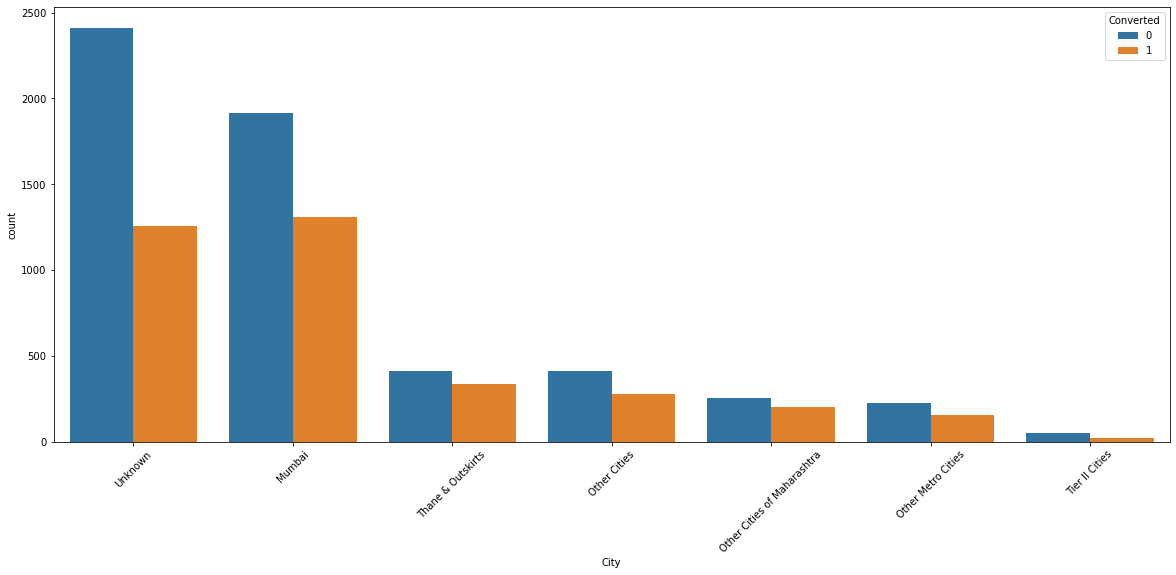

In [36]:
count('City')

#### Mumbai sees the maximum leads.
#### Leads from tier 2 cities are low.

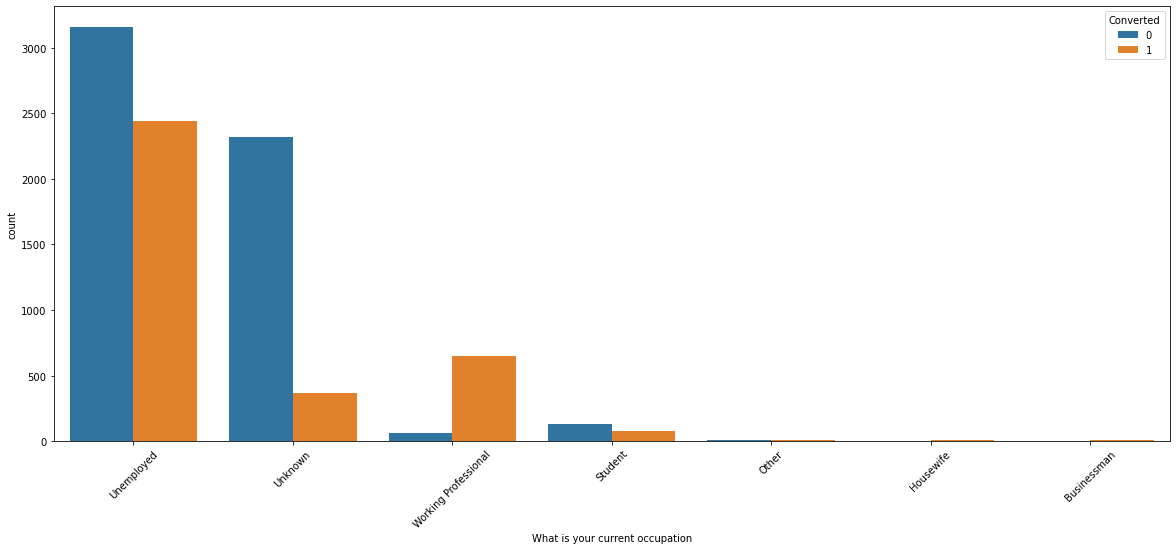

In [37]:
count('What is your current occupation')

#### It is interesting to note that max no of leads have come from 'Unemployed'. Most leads are looking to get employed through this course. The conversion among working professionals is more than non conversions

In [38]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Unknown,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Unknown,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Modified


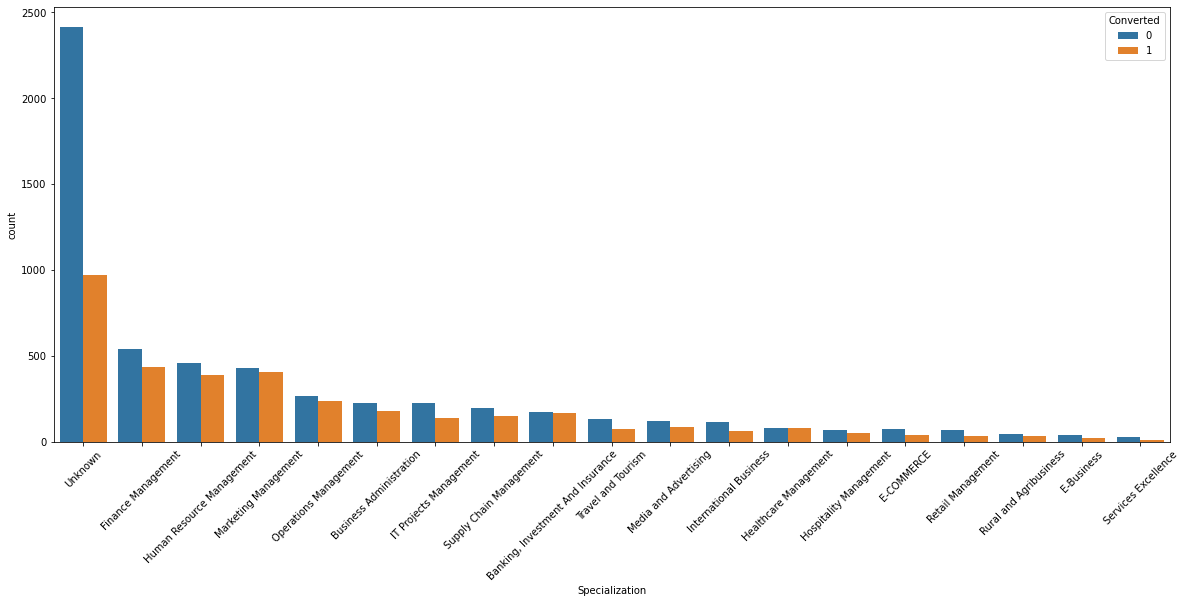

In [39]:
count('Specialization')

#### Leads working in Finance management seem to have been most interested. 

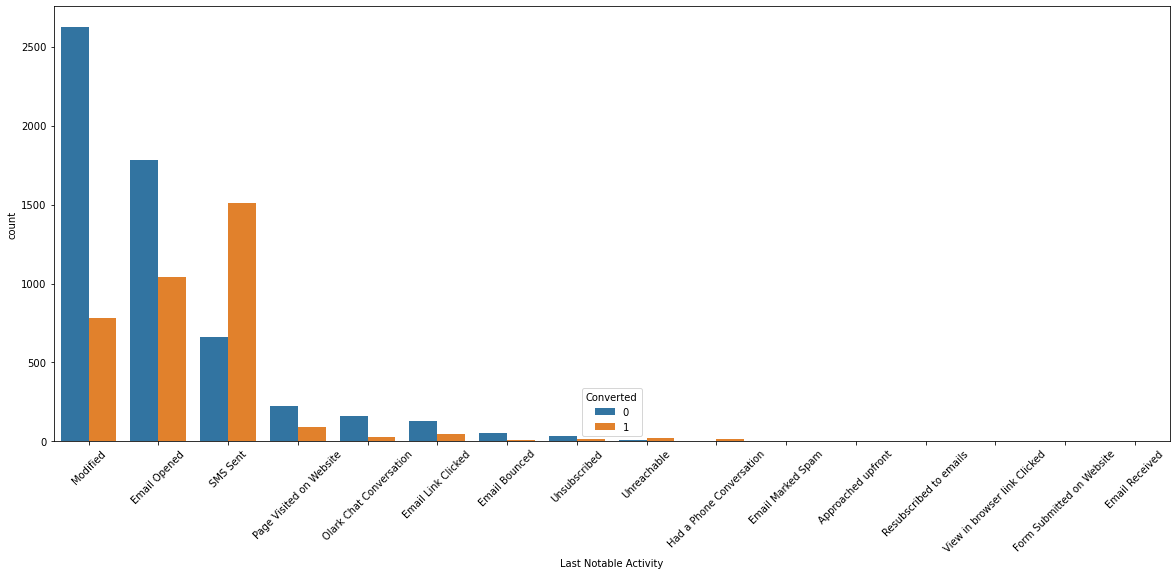

In [40]:
count('Last Notable Activity')

#### Maximum conversions are coming in through SMSs.

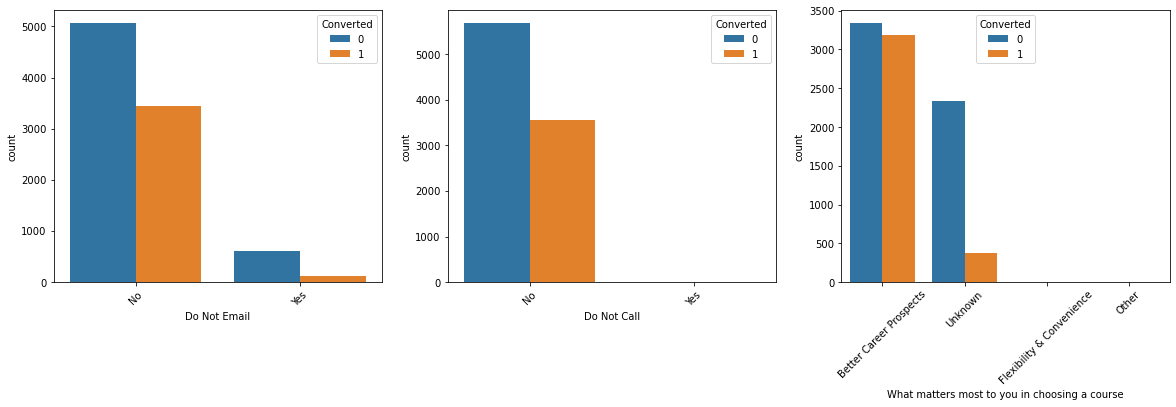

In [41]:
plt.subplots(1,3,figsize=[20,5])
plt.subplot(1,3,1)
sns.countplot(x='Do Not Email',hue='Converted',data=leads,order=leads['Do Not Email'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x='Do Not Call',hue='Converted',data=leads,order=leads['Do Not Call'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=leads,order=leads['What matters most to you in choosing a course'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

#### Most leads are in search of better career prospects.

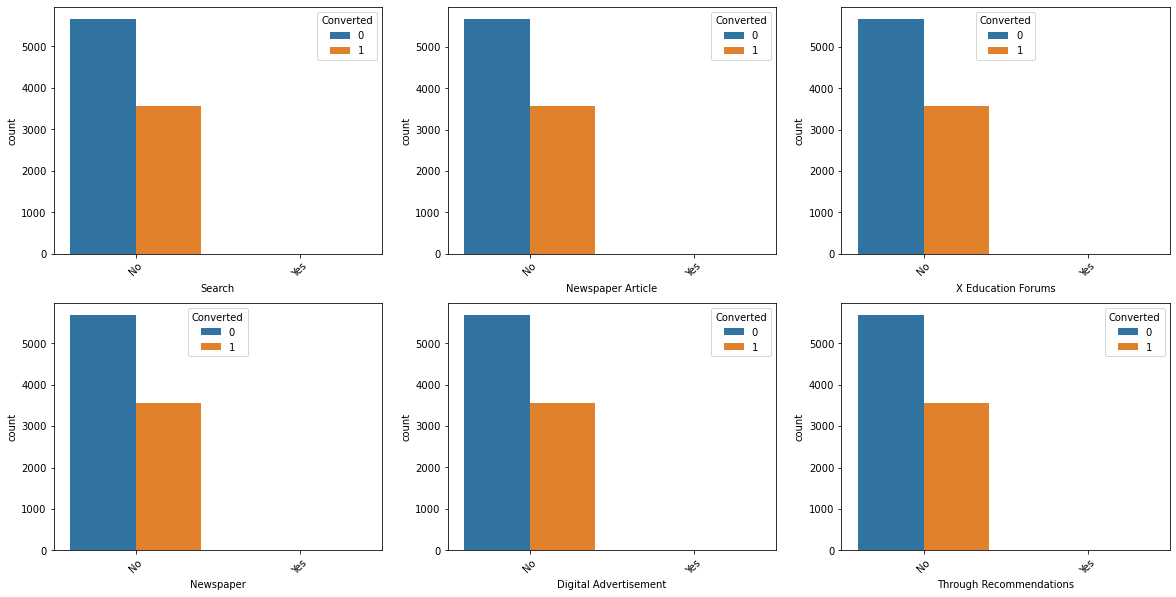

In [42]:
plt.subplots(2,3,figsize=[20,10])
plt.subplot(2,3,1)
sns.countplot(x='Search',hue='Converted',data=leads,order=leads['Search'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,3,2)
sns.countplot(x='Newspaper Article',hue='Converted',data=leads,order=leads['Newspaper Article'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,3,3)
sns.countplot(x='X Education Forums',hue='Converted',data=leads,order=leads['X Education Forums'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,3,4)
sns.countplot(x='Newspaper',hue='Converted',data=leads,order=leads['Newspaper'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,3,5)
sns.countplot(x='Digital Advertisement',hue='Converted',data=leads,order=leads['Digital Advertisement'].value_counts().index)
plt.xticks(rotation=45)
plt.subplot(2,3,6)
sns.countplot(x='Through Recommendations',hue='Converted',data=leads,order=leads['Through Recommendations'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

#### None of the channels above seem to work so better marketing stratgies/methodologies should be put in place.

### 2.2 Comparing numerical variables with target variable.

In [43]:
leads.select_dtypes(include=('int','float')).columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

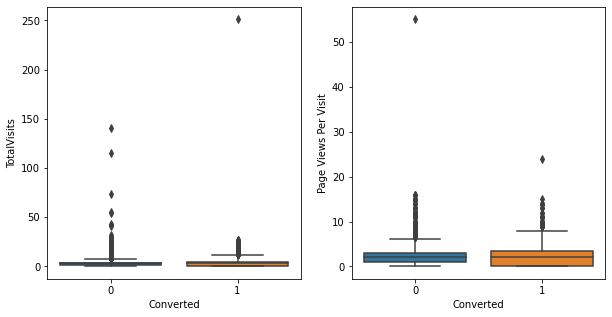

In [44]:
plt.subplots(1,2,figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(y='TotalVisits',x='Converted',data=leads)
plt.subplot(1,2,2)
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads)
plt.show() 

#### There are outliers. Let us treat the outliers.

In [45]:
## Removing Outliers.
Q3 = leads['TotalVisits'].quantile(0.75)
Q1 = leads['TotalVisits'].quantile(0.25)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5 * IQR) & (leads['TotalVisits'] <= Q3 + 1.5 * IQR) ]

Q3 = leads['Page Views Per Visit'].quantile(0.75)
Q1 = leads['Page Views Per Visit'].quantile(0.25)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5 * IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5 * IQR) ]

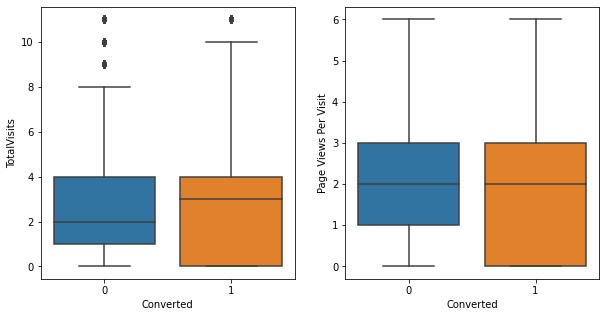

In [46]:
plt.subplots(1,2,figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(y='TotalVisits',x='Converted',data=leads)
plt.subplot(1,2,2)
sns.boxplot(y='Page Views Per Visit',x='Converted',data=leads)
plt.show() 

#### The outliers have been treated. Trend shows that leads who visit more often are likely to be converted.

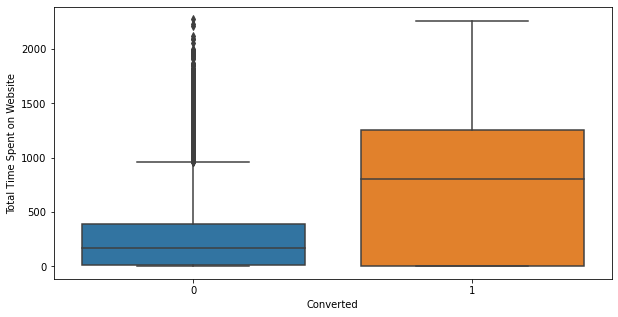

In [47]:
plt.figure(figsize=[10,5])
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=leads)
plt.show()

#### Clearly, a person's time spend on a website is somewhat indicative of him/her being more interested to take up the course.

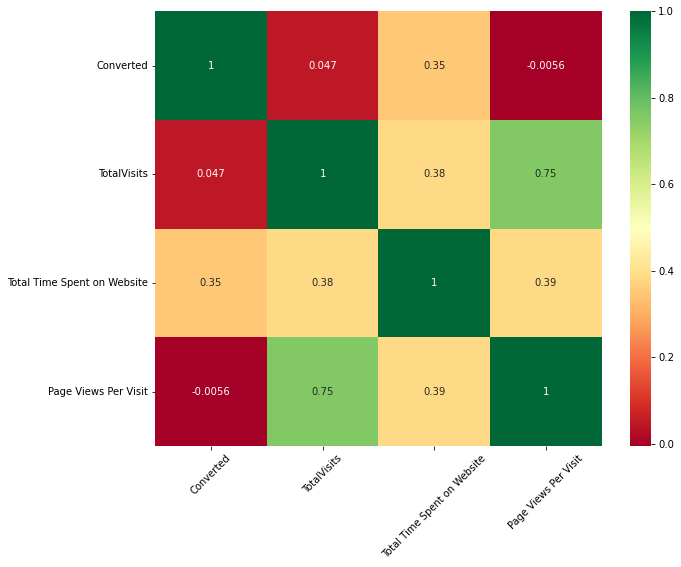

In [48]:
plt.figure(figsize=[10,8])
num=['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
sns.heatmap(leads[num].corr(),annot=True,cmap='RdYlGn')
plt.xticks(rotation=45)
plt.show()

#### Highest Positive correaltion between TotalVisits and Page Views per visit at 0.75

## 3.Model Bulding

### 3.1 Creating Dummy Variables

In [49]:
var=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'City', 'Last Notable Activity']
leads=pd.get_dummies(data=leads,columns=var,drop_first=True)

In [50]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Country_United Arab Emirates,Country_United States,Country_Unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Search_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [51]:
leads.shape

(8679, 104)

### 3.2 Train-Test Split

In [52]:
#importing the required library
from sklearn.model_selection import train_test_split

In [53]:
y=leads.pop('Converted')
X=leads

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
print(X_train.shape)
print(y_train.shape)

(6075, 103)
(6075,)


### 3.3 Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [57]:
leads.select_dtypes(include=('float','int')).columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [58]:
num=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [59]:
X_train[num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6075.000000,6075.000000,6075.000000
mean,2.812675,481.251029,2.070955
std,2.400637,549.931026,1.624597
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,239.000000,2.000000
75%,4.000000,927.500000,3.000000
max,11.000000,2272.000000,6.000000


In [60]:
## Scaling both Train and Test Data

X_train[num]=scaler.fit_transform(X_train[num])
X_test[num]=scaler.transform(X_test[num])

In [61]:
#Both X_test and X_train have been scaled.

X_train[num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6075.000000,6075.000000,6075.000000
mean,0.255698,0.211818,0.345159
std,0.218240,0.242047,0.270766
min,0.000000,0.000000,0.000000
25%,0.090909,0.000440,0.166667
50%,0.272727,0.105194,0.333333
75%,0.363636,0.408231,0.500000
max,1.000000,1.000000,1.000000


In [62]:

X_test[num].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2604.000000,2604.000000,2604.000000
mean,0.256005,0.205171,0.347631
std,0.223015,0.236489,0.279800
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.272727,0.102993,0.333333
75%,0.363636,0.389305,0.500000
max,1.000000,0.971391,1.000000


### 3.4 Feature selection using RFE

In [63]:
#importing the required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import  LogisticRegression

In [64]:
logreg=LogisticRegression()
logreg

LogisticRegression()

In [65]:
rfe=RFE(logreg,15) #selecting 15 columns 
rfe=rfe.fit(X_train,y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 75),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Live Chat', False, 62),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 55),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Pay per Click Ads', False, 85),
 ('Lead Source_Press_Release', False, 78),
 ('Lead Source_Reference', False, 56),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_Unknown', False, 59),
 ('Lead Source_WeLearn', False, 84),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_blog', False, 63),
 ('Lead Source_google', False, 72),
 ('

In [67]:
new=X_train.columns[rfe.support_]

In [68]:
X_train=X_train[new]
X_train.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Country_Unknown,Specialization_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4901,0.305018,0,0,0,0,0,1,0,1,0,1,0,0,0,0
6624,0.475352,1,0,0,0,0,1,0,0,0,0,0,0,0,0
762,0.000000,0,0,0,0,0,0,1,1,0,1,0,1,0,0
2007,0.250000,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3441,0.000000,0,0,0,0,0,0,1,1,0,0,0,0,0,0


### 3.5 Assessing the model with Statsmodel

In [69]:
#importing the required libraries. 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### Defining functions for repetitive use.

In [70]:
def model(X_train):
    X_train_sm=sm.add_constant(X_train)
    logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=logm1.fit()
    return res.summary()

In [71]:
def VIF(X_train):
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF Value']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF Value']=round(vif['VIF Value'],2)
    vif=vif.sort_values(by='VIF Value',ascending=False)
    return vif

Model 1

In [72]:
model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6059
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2356.1
Date:                Sun, 08 May 2022   Deviance:                       4712.2
Time:                        12:51:54   Pearson chi2:                 6.28e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0090      0.139     -7.248      0.000      -1.282      -0.736
Total Time Spent on Website                               4.6528      0.177     26.239      0.000       4.305       5.000
Lead Origin_Landing Page Submission                      -1.1145      0.132     -8.428      0.000      -1.374      -0.855
Lead Origin_Lead Add Form                                 2.0614      0.218      9.473      0.000       1.635       2.488
Lead Source_Facebook                                     -1.3400      0.526     -2.548      0.011      -2.371      -0.309
Lead Source_Welingak Website                             22.8844   1.21e+04      0.002      0.998   -2.38e+04    2.38e+04
Do Not Email_Yes                                         -1.2421      0.179     -6.928      0.000      -1.593      -0.891
Last Activity_SMS Sent                                    1.3792      0.079     17.381      0.000       1.224       1.535
Country_Unknown                                           1.2522      0.126      9.917      0.000       1.005       1.500
Specialization_Unknown                                   -1.1338      0.133     -8.529      0.000      -1.394      -0.873
What is your current occupation_Working Professional      2.3332      0.196     11.919      0.000       1.950       2.717
What matters most to you in choosing a course_Unknown    -1.0566      0.092    -11.430      0.000      -1.238      -0.875
Last Notable Activity_Had a Phone Conversation           24.4477    3.4e+04      0.001      0.999   -6.66e+04    6.66e+04
Last Notable Activity_Modified                           -0.9012      0.083    -10.846      0.000      -1.064      -0.738
Last Notable Activity_Olark Chat Conversation            -1.7459      0.438     -3.987      0.000      -2.604      -0.888
Last Notable Activity_Unreachable                         2.0172      0.558      3.613      0.000       0.923       3.112
=========================================================================================================================
"""

In [73]:
VIF(X_train)

,Features,VIF Value
7,Country_Unknown,2.79
8,Specialization_Unknown,2.70
1,Lead Origin_Landing Page Submission,2.37
0,Total Time Spent on Website,1.98
2,Lead Origin_Lead Add Form,1.96
12,Last Notable Activity_Modified,1.72
10,What matters most to you in choosing a course_...,1.64
6,Last Activity_SMS Sent,1.54
4,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.20


In [74]:
X_train.shape

(6075, 15)

In [75]:
## dropping 'Last Notable Activity_Had a Phone Conversation' as this has a very high p value.
X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)


In [76]:
## Checking if the column was dropped. 

X_train.shape

(6075, 14)

Model 2

In [77]:
model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6060
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2362.1
Date:                Sun, 08 May 2022   Deviance:                       4724.1
Time:                        12:51:54   Pearson chi2:                 6.29e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.9951      0.139     -7.166      0.000      -1.267      -0.723
Total Time Spent on Website                               4.6530      0.177     26.273      0.000       4.306       5.000
Lead Origin_Landing Page Submission                      -1.1148      0.132     -8.451      0.000      -1.373      -0.856
Lead Origin_Lead Add Form                                 2.0594      0.218      9.465      0.000       1.633       2.486
Lead Source_Facebook                                     -1.3419      0.526     -2.552      0.011      -2.372      -0.311
Lead Source_Welingak Website                             22.8863   1.21e+04      0.002      0.998   -2.38e+04    2.38e+04
Do Not Email_Yes                                         -1.2457      0.179     -6.950      0.000      -1.597      -0.894
Last Activity_SMS Sent                                    1.3702      0.079     17.285      0.000       1.215       1.526
Country_Unknown                                           1.2490      0.126      9.897      0.000       1.002       1.496
Specialization_Unknown                                   -1.1380      0.133     -8.574      0.000      -1.398      -0.878
What is your current occupation_Working Professional      2.3318      0.196     11.926      0.000       1.949       2.715
What matters most to you in choosing a course_Unknown    -1.0614      0.092    -11.488      0.000      -1.242      -0.880
Last Notable Activity_Modified                           -0.9087      0.083    -10.944      0.000      -1.071      -0.746
Last Notable Activity_Olark Chat Conversation            -1.7522      0.438     -4.000      0.000      -2.611      -0.894
Last Notable Activity_Unreachable                         2.0067      0.559      3.593      0.000       0.912       3.101
=========================================================================================================================
"""

In [78]:
VIF(X_train)

,Features,VIF Value
7,Country_Unknown,2.79
8,Specialization_Unknown,2.70
1,Lead Origin_Landing Page Submission,2.37
0,Total Time Spent on Website,1.97
2,Lead Origin_Lead Add Form,1.96
11,Last Notable Activity_Modified,1.72
10,What matters most to you in choosing a course_...,1.64
6,Last Activity_SMS Sent,1.54
4,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.20


In [79]:
#dropping 'Lead Source_Welingak Website' as this has a very high p value.
X_train.drop('Lead Source_Welingak Website',axis=1,inplace=True)

Model 3

In [80]:
model(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2376.8
Date:                Sun, 08 May 2022   Deviance:                       4753.5
Time:                        12:51:55   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0502      0.139     -7.556      0.000      -1.323      -0.778
Total Time Spent on Website                               4.6494      0.177     26.233      0.000       4.302       4.997
Lead Origin_Landing Page Submission                      -1.0571      0.132     -8.038      0.000      -1.315      -0.799
Lead Origin_Lead Add Form                                 2.5636      0.209     12.246      0.000       2.153       2.974
Lead Source_Facebook                                     -1.3133      0.525     -2.502      0.012      -2.342      -0.284
Do Not Email_Yes                                         -1.2354      0.177     -6.968      0.000      -1.583      -0.888
Last Activity_SMS Sent                                    1.3705      0.079     17.345      0.000       1.216       1.525
Country_Unknown                                           1.2397      0.126      9.838      0.000       0.993       1.487
Specialization_Unknown                                   -1.0576      0.132     -7.982      0.000      -1.317      -0.798
What is your current occupation_Working Professional      2.3274      0.196     11.900      0.000       1.944       2.711
What matters most to you in choosing a course_Unknown    -1.0677      0.092    -11.559      0.000      -1.249      -0.887
Last Notable Activity_Modified                           -0.9149      0.083    -11.049      0.000      -1.077      -0.753
Last Notable Activity_Olark Chat Conversation            -1.7662      0.440     -4.010      0.000      -2.630      -0.903
Last Notable Activity_Unreachable                         2.0052      0.558      3.593      0.000       0.911       3.099
=========================================================================================================================
"""

In [81]:
VIF(X_train)

,Features,VIF Value
6,Country_Unknown,2.78
7,Specialization_Unknown,2.62
1,Lead Origin_Landing Page Submission,2.36
0,Total Time Spent on Website,1.96
10,Last Notable Activity_Modified,1.71
2,Lead Origin_Lead Add Form,1.63
9,What matters most to you in choosing a course_...,1.63
5,Last Activity_SMS Sent,1.54
8,What is your current occupation_Working Profes...,1.19
4,Do Not Email_Yes,1.12


#### Both VIF and p values are within the permissible value. This would be the final model.

In [82]:
X_train_sm=sm.add_constant(X_train)
logm_final=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm_final.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6075
Model:                            GLM   Df Residuals:                     6061
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2376.8
Date:                Sun, 08 May 2022   Deviance:                       4753.5
Time:                        12:51:55   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.0502      0.139     -7.556      0.000      -1.323      -0.778
Total Time Spent on Website                               4.6494      0.177     26.233      0.000       4.302       4.997
Lead Origin_Landing Page Submission                      -1.0571      0.132     -8.038      0.000      -1.315      -0.799
Lead Origin_Lead Add Form                                 2.5636      0.209     12.246      0.000       2.153       2.974
Lead Source_Facebook                                     -1.3133      0.525     -2.502      0.012      -2.342      -0.284
Do Not Email_Yes                                         -1.2354      0.177     -6.968      0.000      -1.583      -0.888
Last Activity_SMS Sent                                    1.3705      0.079     17.345      0.000       1.216       1.525
Country_Unknown                                           1.2397      0.126      9.838      0.000       0.993       1.487
Specialization_Unknown                                   -1.0576      0.132     -7.982      0.000      -1.317      -0.798
What is your current occupation_Working Professional      2.3274      0.196     11.900      0.000       1.944       2.711
What matters most to you in choosing a course_Unknown    -1.0677      0.092    -11.559      0.000      -1.249      -0.887
Last Notable Activity_Modified                           -0.9149      0.083    -11.049      0.000      -1.077      -0.753
Last Notable Activity_Olark Chat Conversation            -1.7662      0.440     -4.010      0.000      -2.630      -0.903
Last Notable Activity_Unreachable                         2.0052      0.558      3.593      0.000       0.911       3.099
=========================================================================================================================
"""

### 3.6 Model Prediction

In [83]:
y_train_pred=res.predict(X_train_sm)
y_train_pred

4901    0.404456
6624    0.813552
762     0.054641
2007    0.174062
3441    0.295634
          ...   
6112    0.800876
5526    0.362296
5742    0.579098
936     0.982327
7738    0.826343
Length: 6075, dtype: float64

In [84]:
#reshaping y_train_pred
y_train_pred.values.reshape(-1)

array([0.40445583, 0.8135518 , 0.0546408 , ..., 0.5790984 , 0.98232715,
       0.82634258])

In [85]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Probablity of Conversion':y_train_pred})
y_train_pred_final.head(5)

,Converted,Probablity of Conversion
4901,1,0.404456
6624,1,0.813552
762,0,0.054641
2007,0,0.174062
3441,1,0.295634


In [86]:
## Choosing 0.45 as cut-off and aligning with the above data frame.

y_train_pred_final['Predicted']=y_train_pred_final['Probablity of Conversion'].apply(lambda x:1 if x>0.45 else 0)
y_train_pred_final.head(5)

,Converted,Probablity of Conversion,Predicted
4901,1,0.404456,0
6624,1,0.813552,1
762,0,0.054641,0
2007,0,0.174062,0
3441,1,0.295634,0


### 3.7 Model Evaluation

In [87]:
## importing the metric libraries.

from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, recall_score,precision_recall_curve,accuracy_score


In [88]:
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3271,  481],
       [ 587, 1736]])

In [89]:
#Key                   Not Converted      Converted 
#Not Converted           3271                481
#Converted               587                1736

In [90]:
accuracy=accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)
accuracy

0.8241975308641976

### The accuracy score is 82.4%

In [91]:
TN=confusion[0,0] #True Negative
TP=confusion[1,1] #True Positive
FN=confusion[1,0] #False Negative
FP=confusion[0,1] #Flase Positive

In [92]:
#sensitivity
TP/(TP+FN)

0.7473095135600517

In [93]:
#specificity
TN/(TN+FP)

0.8718017057569296

### Finally for a cut-off of 0.45, the accuracy score is 82.4%, sensitivity is 74.7% and specificity is 87.1%

In [94]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Probablity of Conversion'], drop_intermediate = False )

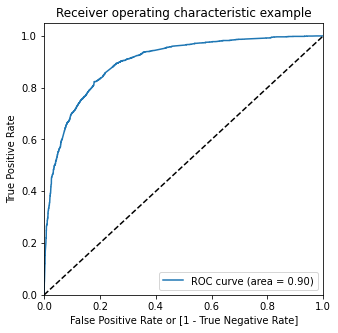

In [96]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final['Probablity of Conversion'])

#### Area under the ROC curve is 0.9. The higher the area the better the model is able to distinguish between Positives and Negatives

In [97]:
#creating columns with different probability cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Probablity of Conversion'].map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Probablity of Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4901,1,0.404456,0,1,1,1,1,1,0,0,0,0,0
6624,1,0.813552,1,1,1,1,1,1,1,1,1,1,0
762,0,0.054641,0,1,0,0,0,0,0,0,0,0,0
2007,0,0.174062,0,1,1,0,0,0,0,0,0,0,0
3441,1,0.295634,0,1,1,1,0,0,0,0,0,0,0


In [98]:
#data frame creating for oberving metrics at different cut offs
cutoff=pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])
for i in numbers:
    confusion_cutoff=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    TN=confusion_cutoff[0,0] #True Negative
    TP=confusion_cutoff[1,1] #True Positive
    FN=confusion_cutoff[1,0] #False Negative
    FP=confusion_cutoff[0,1] 
    Accuracy=accuracy_score(y_train_pred_final.Converted,y_train_pred_final[i])
    Sensitivity=TP/(TP+FN)
    Specificity=TN/(TN+FP)
    cutoff.loc[i]=[i,Accuracy,Sensitivity,Specificity]
cutoff

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.382387,1.000000,0.000000
0.1,0.1,0.641975,0.972880,0.437100
0.2,0.2,0.777942,0.912183,0.694829
0.3,0.3,0.809877,0.853638,0.782783
0.4,0.4,0.820247,0.778304,0.846215
0.5,0.5,0.822881,0.711580,0.891791
0.6,0.6,0.818272,0.649591,0.922708
0.7,0.7,0.798025,0.553164,0.949627
0.8,0.8,0.777778,0.470082,0.968284
0.9,0.9,0.724280,0.300474,0.986674


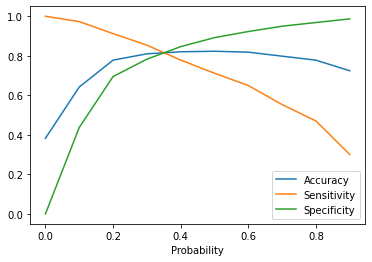

In [99]:
## plotting the above values to find the optimal cutoff.Accuracy
cutoff.plot.line(x='Probability',y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### Seems like the optimal cutoff point is at 0.34

In [100]:
y_train_pred_final['Final_Prediction']=y_train_pred_final['Probablity of Conversion'].apply(lambda x:1 if x>0.34 else 0)
y_train_pred_final.head(10)

,Converted,Probablity of Conversion,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Prediction
4901,1,0.404456,0,1,1,1,1,1,0,0,0,0,0,1
6624,1,0.813552,1,1,1,1,1,1,1,1,1,1,0,1
762,0,0.054641,0,1,0,0,0,0,0,0,0,0,0,0
2007,0,0.174062,0,1,1,0,0,0,0,0,0,0,0,0
3441,1,0.295634,0,1,1,1,0,0,0,0,0,0,0,0
6365,0,0.120553,0,1,1,0,0,0,0,0,0,0,0,0
5243,0,0.063372,0,1,0,0,0,0,0,0,0,0,0,0
7933,0,0.054641,0,1,0,0,0,0,0,0,0,0,0,0
8579,0,0.089446,0,1,0,0,0,0,0,0,0,0,0,0
9171,1,0.608334,1,1,1,1,1,1,1,1,0,0,0,1


In [101]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,'Predicted'],axis=1,inplace=True)
y_train_pred_final.head()

,Converted,Probablity of Conversion,Final_Prediction
4901,1,0.404456,1
6624,1,0.813552,1
762,0,0.054641,0
2007,0,0.174062,0
3441,1,0.295634,0


In [102]:
#Accuracy after making the final prediction.

accuracy=accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Prediction)
print('The accuracy of the model is:',accuracy)

The accuracy of the model is: 0.8154732510288066


#### The accuracy of the training model is 81.5%

In [103]:
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Prediction)
confusion

array([[3026,  726],
       [ 395, 1928]])

In [104]:
TN=confusion[0,0] #True Negative
TP=confusion[1,1] #True Positive
FN=confusion[1,0] #False Negative
FP=confusion[0,1] #False Positive

In [105]:
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
print('The Sensitivity of the model is :',Sensitivity)
print('The Specificity of the model is :',Specificity)
print('The Precision value of the model is :',Precision)
print('The  Recall value of the model is :',Recall)

The Sensitivity of the model is : 0.8299612569952648
The Specificity of the model is : 0.8065031982942431
The Precision value of the model is : 0.7264506405425772
The  Recall value of the model is : 0.8299612569952648


### Finally for a cut-off of 0.34, the accuracy score is 81.5%, sensitivity is 82.9% and specificity is 80.65%

In [106]:
True_positive_rate=TP/(TP+FN)
False_positive_rate=FP/(FP+TN)
Positive_predictive_value=TP/(TP+FP)
Negative_predictive_value=TN/(TN+FN)
print('The True_positive_rate of the model is :',True_positive_rate)
print('The False_positive_rate of the model is :',False_positive_rate)
print('The  Positive_predictive_value of the model is :',Positive_predictive_value)
print('The  Negative_predictive_value of the model is :',Negative_predictive_value)

The True_positive_rate of the model is : 0.8299612569952648
The False_positive_rate of the model is : 0.19349680170575692
The  Positive_predictive_value of the model is : 0.7264506405425772
The  Negative_predictive_value of the model is : 0.884536685179772


#### Lead Score

In [107]:
y_train_pred_final['Lead Score']=(y_train_pred_final['Probablity of Conversion']*100).astype('int64')
y_train_pred_final.sort_values(by='Probablity of Conversion',ascending=False,inplace=True)

In [108]:
y_train_pred_final['Lead Quality']=y_train_pred_final['Lead Score'].apply(lambda x:'Hot' if x>=80 else 'Moderate' if 35<=x<=79 else 'Cold' )
y_train_pred_final

,Converted,Probablity of Conversion,Final_Prediction,Lead Score,Lead Quality
3478,1,0.999509,1,99,Hot
8074,1,0.999470,1,99,Hot
3428,1,0.999197,1,99,Hot
5671,1,0.999086,1,99,Hot
6243,1,0.999073,1,99,Hot
...,...,...,...,...,...
8733,0,0.002373,0,0,Cold
4098,0,0.002156,0,0,Cold
4097,0,0.002057,0,0,Cold
3682,0,0.001967,0,0,Cold


### 3.8 Precision Recall Tradeoff

In [109]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Probablity of Conversion'])

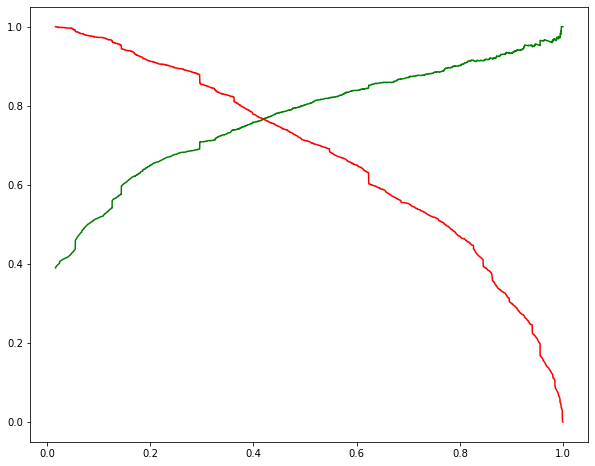

In [110]:
plt.figure(figsize=[10,8])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
y_train_pred_final['Final_Predction_2']=y_train_pred_final['Probablity of Conversion'].apply(lambda x:1 if x>0.41 else 0)
y_train_pred_final.head(10)

,Converted,Probablity of Conversion,Final_Prediction,Lead Score,Lead Quality,Final_Predction_2
3478,1,0.999509,1,99,Hot,1
8074,1,0.999470,1,99,Hot,1
3428,1,0.999197,1,99,Hot,1
5671,1,0.999086,1,99,Hot,1
6243,1,0.999073,1,99,Hot,1
7579,1,0.999035,1,99,Hot,1
6751,1,0.998944,1,99,Hot,1
2158,1,0.998801,1,99,Hot,1
8063,1,0.998691,1,99,Hot,1
8081,1,0.998678,1,99,Hot,1


In [112]:
#Accuracy after making the final prediction.

accuracy=accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Final_Predction_2)
print('The accuracy of the model is:',accuracy)

The accuracy of the model is: 0.819917695473251


In [113]:
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predction_2)
confusion

array([[3190,  562],
       [ 532, 1791]])

In [114]:
TN=confusion[0,0] #True Negative
TP=confusion[1,1] #True Positive
FN=confusion[1,0] #False Negative
FP=confusion[0,1] #False Positive

In [115]:
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
print('The Sensitivity of the model is :',Sensitivity)
print('The Specificity of the model is :',Specificity)

The Sensitivity of the model is : 0.7709857942315971
The Specificity of the model is : 0.8502132196162047


#### Finally, for a cutoff of 0.41, the accuracy of the training set is 81.9%, Sensitvity ay 77.09% and Specificity at 85.02%

### 3.9 Test Prediction

In [116]:
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Unknown,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Country_United Arab Emirates,Country_United States,Country_Unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_Unknown,Search_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.0,2604.000000,2604.000000,2604.000000,2604.0,2604.0,2604.000000,2604.000000,2604.000000,2604.0,2604.000000,2604.000000,2604.0,2604.000000,2604.000000,2604.000000,2604.000000,2604.0,2604.000000,2604.000000,2604.0,2604.0,2604.000000,2604.0,2604.000000,2604.000000,2604.000000,2604.0,2604.000000,2604.0,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.0,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.00

In [117]:
#Selecting only columns which are present in the training data set
col=X_train.columns
col.shape

(13,)

In [118]:
X_test=X_test[col]
X_test.shape

(2604, 13)

In [119]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Do Not Email_Yes,Last Activity_SMS Sent,Country_Unknown,Specialization_Unknown,What is your current occupation_Working Professional,What matters most to you in choosing a course_Unknown,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3423,1.0,0.000000,0,0,0,0,0,1,1,0,1,1,0,0
7935,1.0,0.408891,1,0,0,1,0,0,0,0,1,1,0,0
3009,1.0,0.174736,1,0,0,0,0,0,0,0,1,0,0,0
7432,1.0,0.562060,1,0,0,0,1,0,0,0,0,0,0,0
5038,1.0,0.574824,1,0,0,0,0,0,0,0,0,0,0,0


In [120]:
#Predicting y pred.
y_test_pred=res.predict(X_test_sm)
#converting the above and y_test into a df. 
y_test_pred=pd.DataFrame(y_test_pred)
y_test=pd.DataFrame(y_test)

In [121]:
y_test_pred

,0
3423,0.054641
7935,0.031547
3009,0.086066
7432,0.867197
5038,0.637667
...,...
4637,0.122804
4245,0.684382
2337,0.903441
4731,0.127282


In [122]:
#removing the index
y_test_pred.reset_index(drop=True,inplace=True)

In [123]:
#removing the index

y_test.reset_index(drop=True,inplace=True)

In [124]:
y_test

,Converted
0,0
1,0
2,0
3,1
4,0
...,...
2599,0
2600,1
2601,1
2602,1


In [125]:
y_test_pred.rename(columns={0:'Probability of Conversion'},inplace=True)

In [126]:
#combining both
y_predicted=pd.concat([y_test_pred,y_test],axis=1)
y_predicted.head(10)

,Probability of Conversion,Converted
0,0.054641,0
1,0.031547,0
2,0.086066,0
3,0.867197,1
4,0.637667,0
5,0.854201,0
6,0.297540,1
7,0.987825,1
8,0.145279,0
9,0.044288,0


In [127]:
y_predicted['Final Prediction']=y_predicted['Probability of Conversion'].apply(lambda x:1 if x>0.41 else 0)
y_predicted.head(10)

,Probability of Conversion,Converted,Final Prediction
0,0.054641,0,0
1,0.031547,0,0
2,0.086066,0,0
3,0.867197,1,1
4,0.637667,0,1
5,0.854201,0,1
6,0.297540,1,0
7,0.987825,1,1
8,0.145279,0,0
9,0.044288,0,0


In [128]:
accuracy_test=accuracy_score(y_predicted.Converted,y_predicted['Final Prediction'])
accuracy_test

0.8168202764976958

#### The accuracy of the test set is 81.6 % which is close to training set.

In [129]:
confusion_test=confusion_matrix(y_predicted.Converted,y_predicted['Final Prediction'])
confusion_test

array([[1370,  225],
       [ 252,  757]])

In [130]:
TN=confusion_test[0,0] #True Negative
TP=confusion_test[1,1] #True Positive
FN=confusion_test[1,0] #False Negative
FP=confusion_test[0,1] #False Positive

In [131]:
Sensitivity=TP/(TP+FN)
Specificity=TN/(TN+FP)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
print('The Sensitivity of the model is :',Sensitivity)
print('The Specificity of the model is :',Specificity)
print('The Precision value of the model is :',Precision)
print('The  Recall value of the model is :',Recall)

The Sensitivity of the model is : 0.7502477700693756
The Specificity of the model is : 0.8589341692789969
The Precision value of the model is : 0.7708757637474541
The  Recall value of the model is : 0.7502477700693756


### Finally for a cut-off of 0.41, the accuracy score is 81.6%, sensitivity is 75.02% and specificity is 85.8%

In [132]:
True_positive_rate=TP/(TP+FN)
False_positive_rate=FP/(FP+TN)
Positive_predictive_value=TP/(TP+FP)
Negative_predictive_value=TN/(TN+FN)
print('The True_positive_rate of the model is :',True_positive_rate)
print('The False_positive_rate of the model is :',False_positive_rate)
print('The  Positive_predictive_value of the model is :',Positive_predictive_value)
print('The  Negative_predictive_value of the model is :',Negative_predictive_value)

The True_positive_rate of the model is : 0.7502477700693756
The False_positive_rate of the model is : 0.14106583072100312
The  Positive_predictive_value of the model is : 0.7708757637474541
The  Negative_predictive_value of the model is : 0.8446362515413071


In [133]:
y_predicted

,Probability of Conversion,Converted,Final Prediction
0,0.054641,0,0
1,0.031547,0,0
2,0.086066,0,0
3,0.867197,1,1
4,0.637667,0,1
...,...,...,...
2599,0.122804,0,0
2600,0.684382,1,1
2601,0.903441,1,1
2602,0.127282,1,0


In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_predicted.Converted, y_predicted['Probability of Conversion'], drop_intermediate = False )

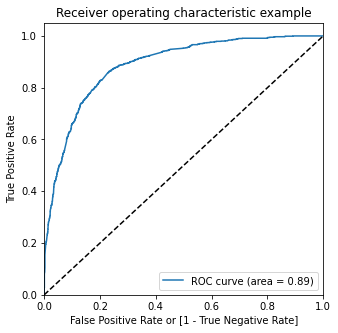

In [135]:
draw_roc (y_predicted.Converted, y_predicted['Probability of Conversion'])
plt.show()

#### The area under ROC curve is 0.89 which is close to roc area for the training data set.

### Assigning lead score.

In [136]:
y_predicted['Lead Score']=(y_predicted['Probability of Conversion']*100).astype('int64')
y_predicted.sort_values(by='Probability of Conversion',ascending=False,inplace=True)

In [137]:
y_predicted.head(10)

,Probability of Conversion,Converted,Final Prediction,Lead Score
1243,0.999542,1,1,99
2018,0.999089,1,1,99
2422,0.999089,1,1,99
2460,0.998506,1,1,99
828,0.998423,1,1,99
1845,0.998423,1,1,99
1329,0.998423,1,1,99
2007,0.998423,1,1,99
825,0.998423,1,1,99
840,0.998423,1,1,99


In [138]:
y_predicted['Lead Quality']=y_predicted['Lead Score'].apply(lambda x:'Hot' if x>=80 else 'Moderate' if 42<=x<=79 else 'Cold' )
y_predicted.head(10)

,Probability of Conversion,Converted,Final Prediction,Lead Score,Lead Quality
1243,0.999542,1,1,99,Hot
2018,0.999089,1,1,99,Hot
2422,0.999089,1,1,99,Hot
2460,0.998506,1,1,99,Hot
828,0.998423,1,1,99,Hot
1845,0.998423,1,1,99,Hot
1329,0.998423,1,1,99,Hot
2007,0.998423,1,1,99,Hot
825,0.998423,1,1,99,Hot
840,0.998423,1,1,99,Hot


## Top Variables

In [139]:
param = pd.DataFrame(res.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
1,Total Time Spent on Website,4.649410
3,Lead Origin_Lead Add Form,2.563554
9,What is your current occupation_Working Profes...,2.327378
13,Last Notable Activity_Unreachable,2.005249
6,Last Activity_SMS Sent,1.370489
7,Country_Unknown,1.239671
11,Last Notable Activity_Modified,-0.914881
0,const,-1.050235
2,Lead Origin_Landing Page Submission,-1.057105


## Final Analysis - 



Train Data:
- 0.34 as threshold.
- Model Accuracy value is : 81.54 %
- Model Sensitivity value is : 82.96 %
- Model Specificity value is : 80.65 %

Precision Recall Trade-off:
- 0.41 as threshold.
- Model Accuracy value is : 81.9 %
- Model Sensitivity value is : 77.09 %
- Model Specificity value is : 85.02 %

Test Data:
- 0.41 as threshold.
- Model Accuracy value is : 81.60 %
- Model Sensitivity value is : 75.02 %
- Model Specificity value is : 85.8 %

Top 3 variables with positive influence on conversion-

- Total Time Spent on Website
- Lead Origin_Lead Add Form
- What is your current occupation_Working Professional

Top 3 variables with negative influence on conversion-

- Last Notable Activity_Olark Chat Conversation
- Lead Source_Facebook	
- Do Not Email_Yes

